### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [11]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
!pip install pandas openpyxl

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
import pandas as pd

# Corrected URL of the raw Excel file
url = "https://raw.githubusercontent.com/velcheiana/datasets/main/Supermarket-December-2017.xlsx"

# Load the Excel file into a DataFrame
data = pd.read_excel(url, engine='openpyxl')

# Display the first few rows
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# List of columns considered not important
unimportant_columns = [
    'KDSUP', 'TRN_DK', 'GDG', 'GGD', 'KDSLS', 'BIN', 'KDBIN', 'NO_ORD',
    'SLD_AK', 'SLD_AKG', 'HRG_OLD', 'HRGBL_OLD','JLH_DIS', 'JLH_DIS1', 'JLH_DIS2', 'HRGJL_OLD', 'HRGJL1_OLD',
    'HRGJL2_OLD', 'SUPP_OLD', 'DISB1_OLD', 'DISB2_OLD', 'PPN_OLD',
    'PPNBM', 'PPNBM_OLD', 'PTS_GDG', 'PTS_KEL', 'PTS_ITEM', 'QTY_PTS',
    'TRNBL', 'POST', 'TGL_OLD', 'FILLER', 'SUPPLIER', 'DEP_SWA', 'GON',
    'KONS', 'POST_STOK', 'STATUS', 'TP_ADJ', 'USER', 'LAMA_CRD', 'KD_SBR','TP_TRN','KAS','ITEM']

# Remove unimportant columns
data.drop(unimportant_columns, axis=1, inplace=True)
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KEL,NAMA,TGL_TRANS,NO_BKT,STS_BYR,QTY,HRG_PKK,HRG_JUL,DISC,DISC1,DISC2,PPN,JLH_TRANS,KET_TRANS,TANGGAL,JAM
0,KERTAS,KERTAS KADO SINAR DU,2017-01-02,060102001,CD,2.0,549.98,1100.0,0.0,0.0,NaN,0.0,2200.0,CASH DISCOUNT,2017-01-02,08:12:02
1,BTL/DOT,PIGEON BTL PP RP 240,2017-01-02,060102002,CD,1.0,20640.45,23000.0,0.0,0.0,NaN,0.0,23000.0,CASH DISCOUNT,2017-01-02,08:24:51
2,MUSTIKA,MR SEKAR TANJUNG KB,2017-01-02,060102003,CD,1.0,8720.00,9500.0,0.0,0.0,NaN,0.0,9500.0,CASH DISCOUNT,2017-01-02,08:28:18
3,SABUN.C,BIORE BF 100ML WHITE,2017-01-02,060102003,CD,1.0,6215.00,6900.0,0.0,0.0,NaN,0.0,6900.0,CASH DISCOUNT,2017-01-02,08:28:22
4,LULURMD,OVALE LULUR BALI BEN,2017-01-02,060102003,CD,1.0,12119.65,13500.0,0.0,0.0,NaN,0.0,13500.0,CASH DISCOUNT,2017-01-02,08:28:20


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   KEL        148486 non-null  object        
 1   NAMA       148486 non-null  object        
 2   TGL_TRANS  148486 non-null  datetime64[ns]
 3   NO_BKT     148486 non-null  object        
 4   STS_BYR    136294 non-null  object        
 5   QTY        148486 non-null  float64       
 6   HRG_PKK    148486 non-null  float64       
 7   HRG_JUL    148486 non-null  float64       
 8   DISC       146957 non-null  float64       
 9   DISC1      14695 non-null   float64       
 10  DISC2      10753 non-null   float64       
 11  PPN        146600 non-null  float64       
 12  JLH_TRANS  148486 non-null  float64       
 13  KET_TRANS  148486 non-null  object        
 14  TANGGAL    148486 non-null  datetime64[ns]
 15  JAM        148486 non-null  object        
dtypes: datetime64[ns](2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KEL,3
NAMA,3
TGL_TRANS,3
NO_BKT,3
STS_BYR,12195
QTY,3
HRG_PKK,3
HRG_JUL,3
DISC,1532
DISC1,133794


In [17]:
# Replace nulls in 'DISC', 'DISC1', and 'DISC2' with 0
data['DISC'] = data['DISC'].fillna(0)
data['DISC1'] = data['DISC1'].fillna(0)
data['DISC2'] = data['DISC2'].fillna(0)

# Drop nulls in all other columns
columns_to_drop_nulls = data.columns.difference(['DISC', 'DISC1', 'DISC2'])
data.dropna(subset=columns_to_drop_nulls, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
data.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KEL,NAMA,TGL_TRANS,NO_BKT,STS_BYR,QTY,HRG_PKK,HRG_JUL,DISC,DISC1,DISC2,PPN,JLH_TRANS,KET_TRANS,TANGGAL,JAM
0,KERTAS,KERTAS KADO SINAR DU,2017-01-02,060102001,CD,2.0,549.98,1100.0,0.0,0.0,0.0,0.0,2200.0,CASH DISCOUNT,2017-01-02,08:12:02
1,BTL/DOT,PIGEON BTL PP RP 240,2017-01-02,060102002,CD,1.0,20640.45,23000.0,0.0,0.0,0.0,0.0,23000.0,CASH DISCOUNT,2017-01-02,08:24:51
2,MUSTIKA,MR SEKAR TANJUNG KB,2017-01-02,060102003,CD,1.0,8720.00,9500.0,0.0,0.0,0.0,0.0,9500.0,CASH DISCOUNT,2017-01-02,08:28:18
3,SABUN.C,BIORE BF 100ML WHITE,2017-01-02,060102003,CD,1.0,6215.00,6900.0,0.0,0.0,0.0,0.0,6900.0,CASH DISCOUNT,2017-01-02,08:28:22
4,LULURMD,OVALE LULUR BALI BEN,2017-01-02,060102003,CD,1.0,12119.65,13500.0,0.0,0.0,0.0,0.0,13500.0,CASH DISCOUNT,2017-01-02,08:28:20
5,VIVA,VIVA COMP LILAC NATU,2017-01-02,060102003,CD,1.0,9479.98,10300.0,0.0,0.0,0.0,0.0,10300.0,CASH DISCOUNT,2017-01-02,08:28:11
6,SHAMPOO,SUNSILK COND 80ML SO,2017-01-02,060102003,CD,1.0,7702.60,8600.0,0.0,0.0,0.0,0.0,8600.0,CASH DISCOUNT,2017-01-02,08:28:36
7,KOSMETC,PUFF RAFFINI [K],2017-01-02,060102003,CD,1.0,2623.87,3800.0,0.0,0.0,0.0,0.0,3800.0,CASH DISCOUNT,2017-01-02,08:28:13
8,PMBALUT,ANYTIME PANTYLINER S,2017-01-02,060102003,CD,1.0,5662.29,6700.0,0.0,0.0,0.0,0.0,6700.0,CASH DISCOUNT,2017-01-02,08:28:16
9,PARFUME,CASABLANCA B.MIST 10,2017-01-02,060102004,CD,1.0,11579.20,12900.0,0.0,0.0,0.0,0.0,12900.0,CASH DISCOUNT,2017-01-02,08:29:22


In [19]:
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KEL,0
NAMA,0
TGL_TRANS,0
NO_BKT,0
STS_BYR,0
QTY,0
HRG_PKK,0
HRG_JUL,0
DISC,0
DISC1,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-21-2596892ccaa8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_sales.index, y=payment_sales.values, palette='coolwarm')


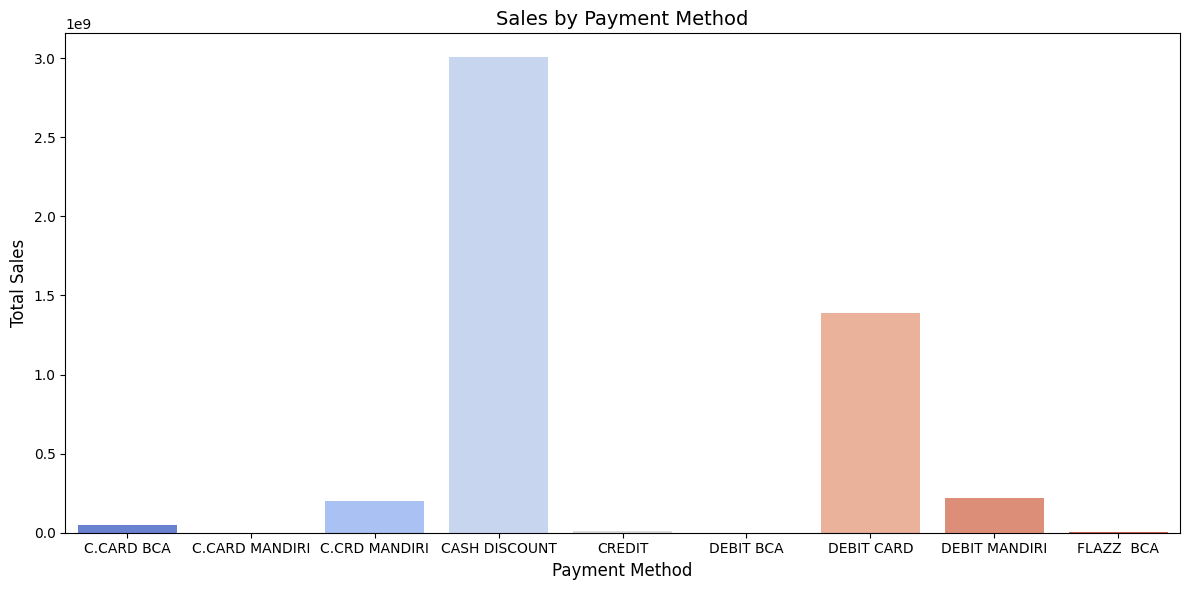

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
# Calculate total sales per payment method
payment_sales = data.groupby('KET_TRANS')['JLH_TRANS'].sum()

# Create a bar chart".
plt.figure(figsize=(12, 6))
sns.barplot(x=payment_sales.index, y=payment_sales.values, palette='coolwarm')
plt.title('Sales by Payment Method', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.tight_layout()
plt.show()


From the above visualization, it is evident that the majority of customers prefer to use cash as their payment method, followed by debit cards, with credit cards being the least preferred.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


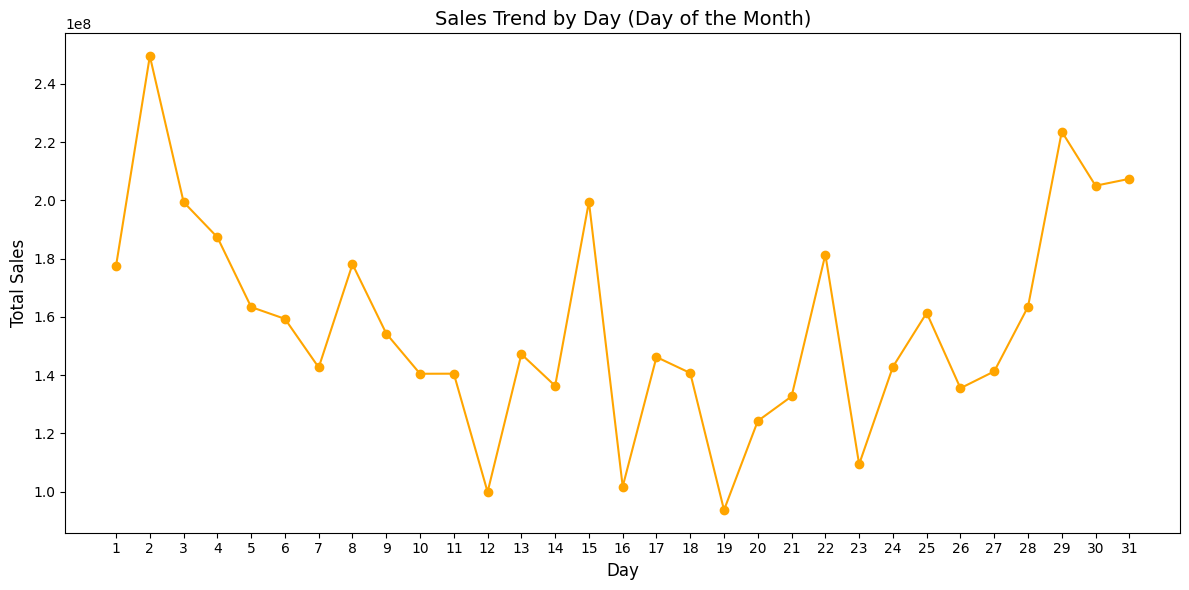

In [23]:
# Convert TGL_TRANS to datetime if it has not been done yet
data['TGL_TRANS'] = pd.to_datetime(data['TGL_TRANS'])

# Add a day column (only the date)
data['Day'] = data['TGL_TRANS'].dt.day

# Calculate total transactions based on the date (without month/year)
daily_sales = data.groupby('Day')['JLH_TRANS'].sum().reset_index()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Day'], daily_sales['JLH_TRANS'], marker='o', color='orange', linestyle='-')
plt.title('Sales Trend by Day (Day of the Month)', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(range(1, 32))  #
plt.tight_layout()
plt.show()

The code emphasizes the sales performance trends throughout each date over the 12 months. Sales usually peak at the beginning (2), middle (14), and end (31) of the month.

In [24]:
# Convert 'TGL_TRANS' column to datetime if it is not already
data['TGL_TRANS'] = pd.to_datetime(data['TGL_TRANS'], errors='coerce')

# Now, extract the day of the week
data['Days'] = data['TGL_TRANS'].dt.day_name()

# Group by 'Days' and sum up transactions for each day
daily_transactions_count = data.groupby('Days').size().reset_index(name='Transaction_Count')

# Ensure 'Days' is ordered (Monday to Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_transactions_count['Days'] = pd.Categorical(daily_transactions_count['Days'], categories=day_order, ordered=True)

# Sort by the correct day order
daily_transactions_count = daily_transactions_count.sort_values('Days')

# Display the result
print(daily_transactions_count)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


        Days  Transaction_Count
1     Monday              22487
5    Tuesday              23828
6  Wednesday              16643
4   Thursday              14323
0     Friday              15932
2   Saturday              15813
3     Sunday              26911


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-25-abb57f811e08>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Days', y='Transaction_Count', data=daily_transactions_count, marker='o', palette='viridis')


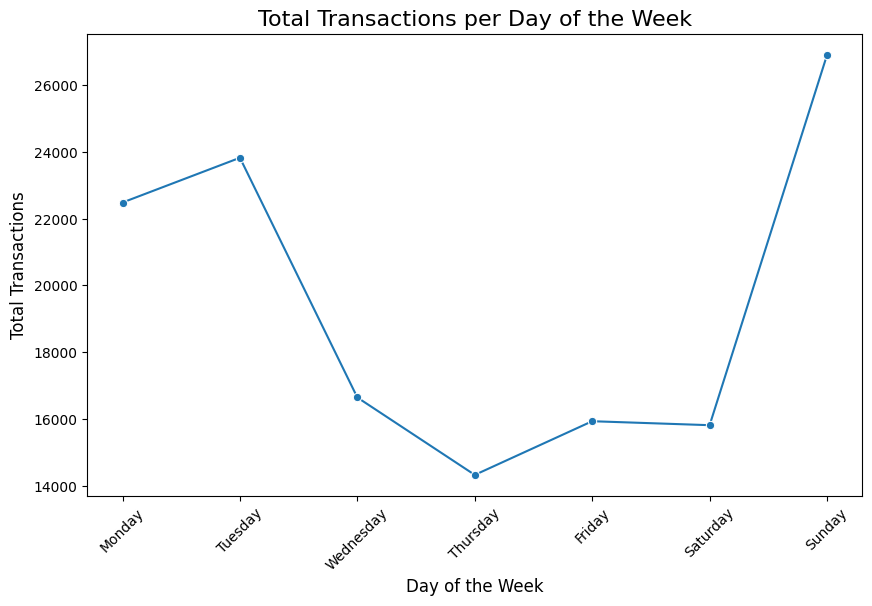

In [25]:
# Plotting with Seaborn (Line Chart)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Days', y='Transaction_Count', data=daily_transactions_count, marker='o', palette='viridis')

# Add labels and title
plt.title('Total Transactions per Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)
plt.xticks(rotation=45)  # Rotate day labels for better readability

# Show the plot
plt.show()

From the above visualization, we can observe that peak sales in the supermarket occur on Tuesday and Sunday. Sales experience a sharp decline from Tuesday to Wednesday and continue to drop until Thursday. However, there is a slight increase in sales on Friday.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


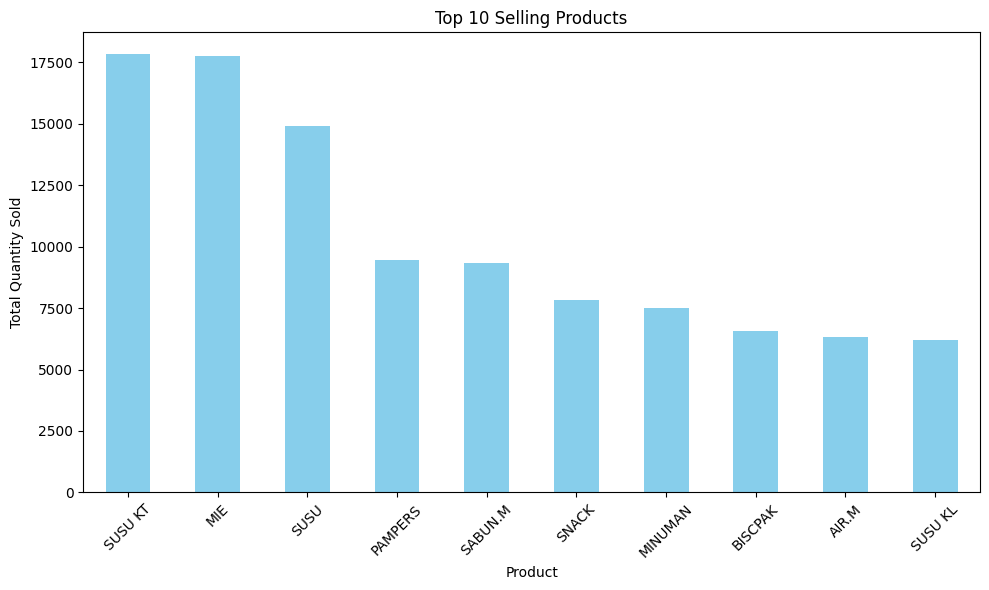

In [26]:
top_products = data.groupby('KEL')['QTY'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The visualisations helps to see the most popular items categories in the supermarket.Susu KT being the most popular categories, followed by Mie, susu, and so on.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-27-2720f8b10f8b>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  item_counts_by_period = data.groupby(['period_day', 'KEL']).size().reset_index(name='count')
<ipython-input-27-2720f8b10f8b>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_i

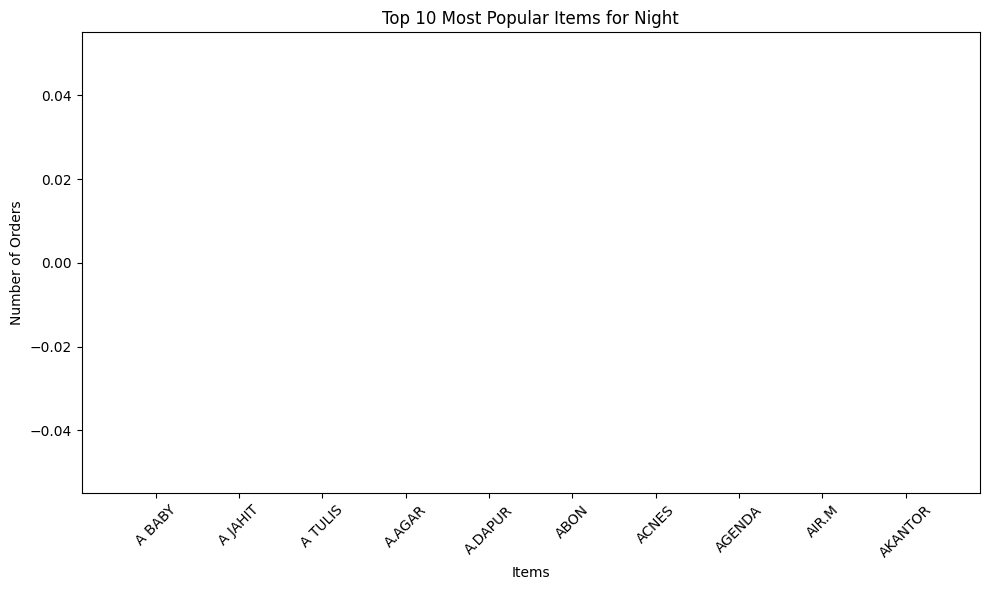

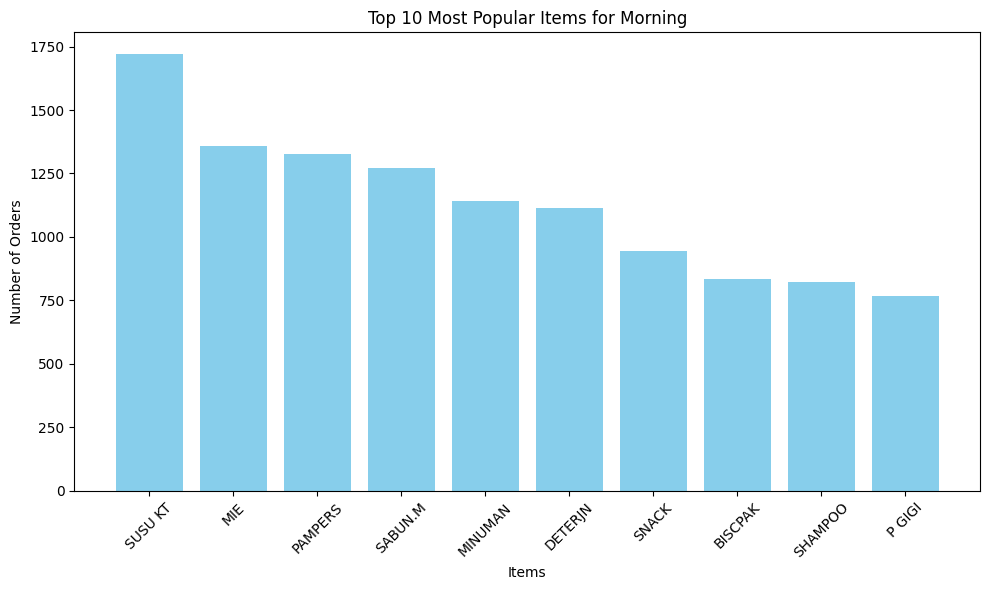

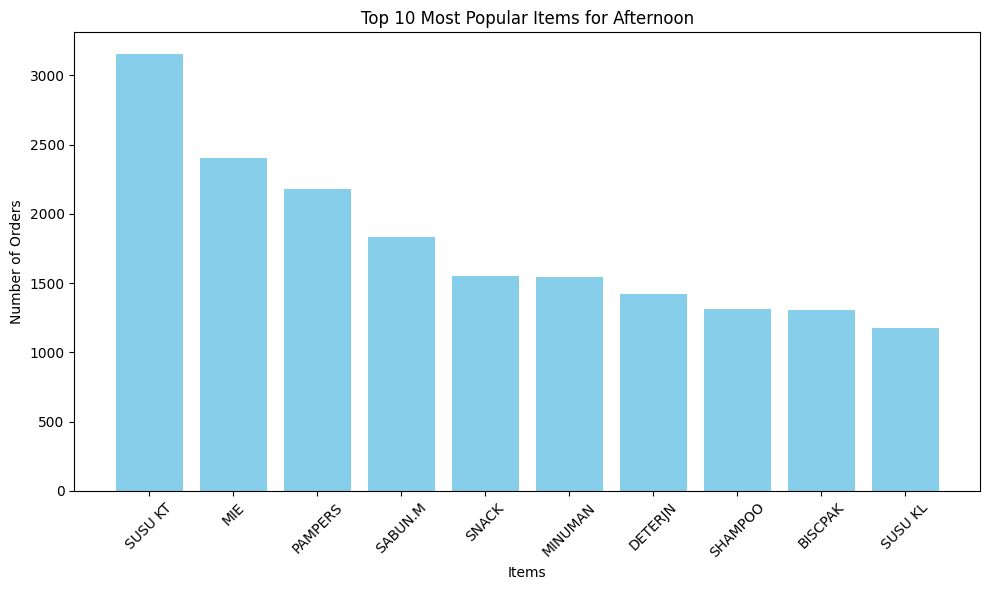

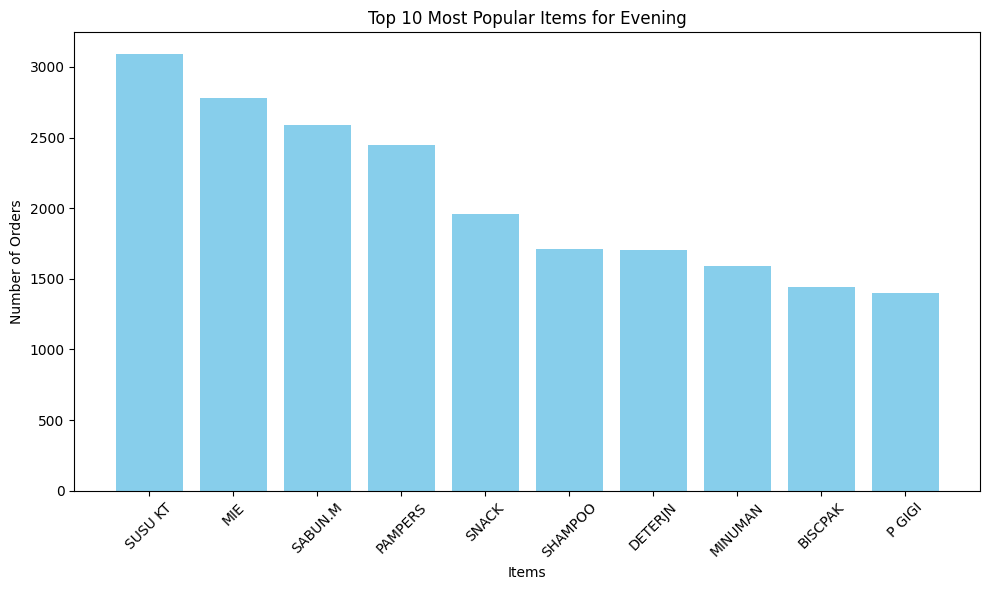

In [27]:
# Visualization for each period of day (Morning to Night)
# Create a period column based on time of day
data['hour'] = pd.to_datetime(data['JAM'], format='%H:%M:%S', errors='coerce').dt.hour
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
data['period_day'] = pd.cut(data['hour'], bins=bins, labels=labels, right=False)

# Count item occurrences by period
item_counts_by_period = data.groupby(['period_day', 'KEL']).size().reset_index(name='count')

# Extract top 10 items for each period
top_items_by_period = item_counts_by_period.groupby('period_day').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

# Plot top items for each period
periods = top_items_by_period['period_day'].unique()
for period in periods:
    data = top_items_by_period[top_items_by_period['period_day'] == period]

    plt.figure(figsize=(10, 6))
    plt.bar(data['KEL'], data['count'], color='skyblue')
    plt.xlabel('Items')
    plt.ylabel('Number of Orders')
    plt.title(f'Top 10 Most Popular Items for {period}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

This highlights the distribution of items sold at the supermarket at different times of the day. "Susu KT" consistently ranks as the top-selling item throughout the day. Interestingly, the top 5 items in the morning and evening are the same, although their order varies slightly in the morning. The charts for nighttime are empty, likely due to the supermarket being closed during that period.

In [28]:
# Create a crosstab of transactions vs items, using the original data
apriori_data = pd.crosstab(pd.read_excel(url, engine='openpyxl')['NO_BKT'], data['KEL'])
apriori_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KEL,BISCPAK,DETERJN,MIE,MINUMAN,P GIGI,PAMPERS,SABUN.M,SHAMPOO,SNACK,SUSU KT
NO_BKT,,,,,,,,,,
060102007,0,0,0,0,0,0,0,0,0,1
060102008,0,0,1,0,0,1,1,0,0,0
060102009,0,0,0,0,0,0,0,1,1,0
060102010,1,1,0,1,1,0,0,0,0,0


In [29]:
# Convert quantities to 1 and 0
basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-29-7e98910f9cad>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)


KEL,BISCPAK,DETERJN,MIE,MINUMAN,P GIGI,PAMPERS,SABUN.M,SHAMPOO,SNACK,SUSU KT
NO_BKT,,,,,,,,,,
060102007,0,0,0,0,0,0,0,0,0,1
060102008,0,0,1,0,0,1,1,0,0,0
060102009,0,0,0,0,0,0,0,1,1,0
060102010,1,1,0,1,1,0,0,0,0,0


In [30]:
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)
output = frequent_itemsets[['support', 'itemsets']]
print("Frequent Itemsets:")
output

Frequent Itemsets:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.25,(BISCPAK)
1,0.25,(DETERJN)
2,0.25,(MIE)
3,0.25,(MINUMAN)
4,0.25,(P GIGI)
5,0.25,(PAMPERS)
6,0.25,(SABUN.M)
7,0.25,(SHAMPOO)
8,0.25,(SNACK)
9,0.25,(SUSU KT)


In [31]:
# Apply Apriori algorithm
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

# Generate association rules, using support as the selection criteria
# The support_only parameter has been removed
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=frequent_itemsets)

# Display the association rules
display(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(DETERJN),(BISCPAK),0.25,0.25,0.25,1.0,4.0,1.0,0.1875,inf,1.0,1.0,1.0,1.0
1,(BISCPAK),(DETERJN),0.25,0.25,0.25,1.0,4.0,1.0,0.1875,inf,1.0,1.0,1.0,1.0
2,(BISCPAK),(MINUMAN),0.25,0.25,0.25,1.0,4.0,1.0,0.1875,inf,1.0,1.0,1.0,1.0
3,(MINUMAN),(BISCPAK),0.25,0.25,0.25,1.0,4.0,1.0,0.1875,inf,1.0,1.0,1.0,1.0
4,(P GIGI),(BISCPAK),0.25,0.25,0.25,1.0,4.0,1.0,0.1875,inf,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,"(BISCPAK, MINUMAN)","(DETERJN, P GIGI)",0.25,0.25,0.25,1.0,4.0,1.0,0.1875,inf,1.0,1.0,1.0,1.0
60,(DETERJN),"(BISCPAK, P GIGI, MINUMAN)",0.25,0.25,0.25,1.0,4.0,1.0,0.1875,inf,1.0,1.0,1.0,1.0
61,(P GIGI),"(DETERJN, BISCPAK, MINUMAN)",0.25,0.25,0.25,1.0,4.0,1.0,0.1875,inf,1.0,1.0,1.0,1.0
62,(BISCPAK),"(DETERJN, P GIGI, MINUMAN)",0.25,0.25,0.25,1.0,4.0,1.0,0.1875,inf,1.0,1.0,1.0,1.0


### Key Insights and Trends

#### 1. Top-Selling Categories:
- **Mie, Susu KT, Susu, Beverages**: These categories represent a significant share of sales and should be strategically placed within the store.
- **Susu KT**: This item remains a consistent best-seller throughout the day, highlighting strong customer demand.

#### 2. Customer Preferences:
- **Payment Methods**: Cash continues to be the most popular payment method, followed by debit cards. It’s important to ensure efficient cash handling and provide clear alternatives for other payment options.
- **Peak Sales Periods**: Sales tend to peak at the start (2nd), middle (14th), and end (31st) of the month, suggesting purchasing patterns related to paydays or monthly cycles.
- **High-Sales Days**: Tuesdays and Sundays experience the highest sales, indicating the need for effective staffing and inventory management on these days.

#### 3. Time-Based Demand:
- **Susu KT**: Maintain adequate stock and visibility throughout the day to meet consistent demand.
- **Morning and Evening**: Tailor promotions and displays to meet customer needs during these times (e.g., breakfast items in the morning).

#### 4. Association Rules (Cross-Selling Opportunities):
- Although specific product combinations require further analysis, the general approach should focus on placing complementary items together (e.g., Mie with Saos, Susu KT with Roti, and Beverages with Snacks).

### Actionable Suggestions for the Supermarket

#### 1. Strategic Product Placement:
- **Prime Locations**: Place top-selling categories and Susu KT in high-traffic areas like entrances, checkout counters, and end-caps.
- **Complementary Pairing**: Use insights from association rules to position frequently purchased items together to encourage cross-selling.
- **Seasonal Displays**: Feature seasonal or promotional items during peak sales periods (e.g., back-to-school or holiday displays).

#### 2. Checkout Optimization:
- **Efficient Cash Handling**: Train staff to ensure quick and efficient cash transactions at point-of-sale systems.
- **Payment Options**: Make debit and credit card payment options readily available and clearly visible.

#### 3. Time-Based Promotions:
- **Susu KT**: Run continuous promotions to capitalize on its popularity.
- **Morning and Evening Deals**: Offer targeted promotions during these times, such as coffee and breakfast deals in the morning.

#### 4. Staff Scheduling:
- **Peak Days**: Ensure adequate staffing on Tuesdays and Sundays to handle high customer volumes.
- **Flexible Hours**: Adjust staffing dynamically based on real-time customer flow to maintain efficiency and satisfaction.

#### 5. Data-Driven Decisions:
- **Ongoing Monitoring**: Continuously analyze sales, customer behavior, and inventory data to adjust strategies as new trends emerge.
- **Testing**: Experiment with different store layouts, promotions, and pricing to find the most effective strategies.
- **Association Rule Insights**: Leverage refined association rule mining to uncover product pairings that can enhance placement and sales strategies.

### Next Steps

#### 1. Implement Association Rule Mining:
- Conduct association rule analysis to identify specific product combinations frequently bought together.

#### 2. Optimize Layout:
- Rearrange store sections based on identified product pairings to improve customer convenience.

#### 3. Track and Evaluate:
- Monitor the performance of sales, customer feedback, and key metrics to assess the effectiveness of changes and adjust strategies accordingly.

### Example: Focus for January

For January, the supermarket can concentrate on the following:
- **Back-to-School Promotions**: Create a section featuring essentials like stationery, snacks, and beverages.
- **Healthy Start Initiatives**: Promote health-conscious products such as fresh produce, yogurt, and Susu KT to align with New Year resolutions.
- **Layout Adjustments**: Use findings from association rules to strategically place complementary products.
- **Performance Monitoring**: Track the sales of promoted items and cross-selling opportunities to measure the success of these initiatives.